In [48]:
#Un dataset

#necessaire : 
#modèle - fonction de cout - gradients - descente de gradient

In [49]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1 - Dataset

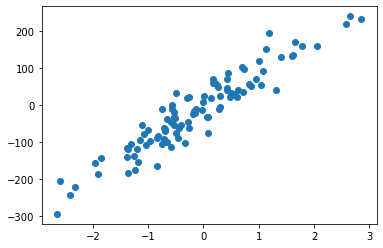

In [50]:
#génère un dataset depuis la librairie sklearn
x, y = make_regression(n_samples=100, n_features = 2, noise = 10)

# display du dataset : 
plt.scatter(x[:,0], y)

In [51]:
print(x.shape)
#par defaut les dimentions de y sont incomplètes "(100, )"
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [52]:
#matrice X
#hstack permet de fusionner deux matrices, ones génére une matrice constitué de 1 de dimension comme paramètre
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(X[:10])

(100, 3)
[[ 0.05912686 -1.04072339  1.        ]
 [-1.84671411  0.6248105   1.        ]
 [ 0.01197841  0.41758162  1.        ]
 [ 0.08661793 -1.95330072  1.        ]
 [-0.40621731 -0.53643685  1.        ]
 [-1.89892532 -0.21126854  1.        ]
 [ 0.17792988  1.32408556  1.        ]
 [-2.3296224   0.23815937  1.        ]
 [-1.24399821 -1.79990382  1.        ]
 [ 1.18909369  2.36165887  1.        ]]


In [53]:
theta = np.random.randn(3, 1)
theta

array([[-1.16538562],
       [-0.70672336],
       [ 0.54660145]])

# 2 - Modèle

In [54]:
#modèle linéaire donc notre fonction doit être de la forme X.theta ainsi elle doit simplement retourner le produit matricielle
def model(X, theta):
    return X.dot(theta) #permet de faire le produit matricielle de X par theta

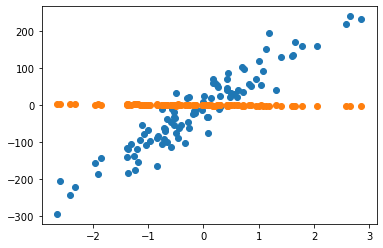

In [55]:
#tester le modèle
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta))
#courbe mauvaise

# 3 - Fonction cout

In [56]:
#Fonction cout est l'erreur quadratique moyenne : "1/2m * sum(X.theta - y)**2"
#m designe le nb de pts dans le data set, m = len(y)
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [57]:
cost_function(X, y, theta)

5876.031972327701

# 4 - Gradient & Descente de Gradient

In [58]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [59]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

# 5 - Entrainement du modèle

In [60]:
theta_final = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [61]:
theta_final

array([[90.9637782 ],
       [31.66731643],
       [ 0.30011917]])

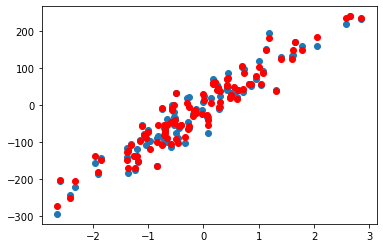

In [70]:
# courbe pour x1


predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c='r')

# BILAN : la courbe obtenue est desormais satisfaisante

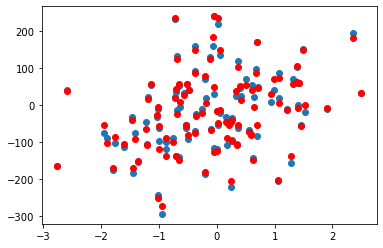

In [71]:
# courbe pour x2

predictions = model(X, theta_final)
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

# 6 - Comment tracer la minimisation avec la fonction cout
# La machine apprend elle bien ?

In [63]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [64]:
theta_final, cost_history = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

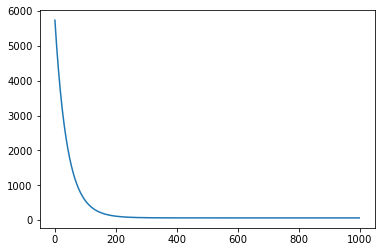

In [65]:
#Affiche l'évolution de la minimisation en fonction du nb d'itérations
plt.plot(range(1000), cost_history)

# 7 - Coefficient de determination | afficher les performance du modèle

In [66]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [67]:
coef_determination(y, predictions)

0.9881969725300483